In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# membaca citra covid dan citra mask
img = cv2.imread('covid_image.png')
img_mask = cv2.imread('mask.png')

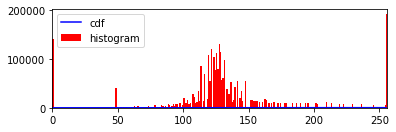

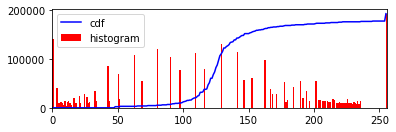

In [15]:
# operasi histogram

hist,bins = np.histogram(img.flatten(),256,[0,256])  # histogram citra covid
cdf = hist.cumsum() # cdf = cumulative distribution function
cdf_m = np.ma.masked_equal(cdf,0) #masking
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) #normalisasi
cdf = np.ma.filled(cdf_m,0).astype('uint8') #mengembalikan ke dalam tipe data uint8
img2 = cdf[img] #mengubah citra menjadi citra yang sudah di normalisasi
cdf_normalized = cdf * float(hist.max()) / cdf.max() #normalisasi histogram

plt.subplot(2, 1, 1)
plt.plot(cdf, color = 'b') #plot histogram
plt.hist(img.flatten(),256,[0,256], color = 'r') # menampilkan histogram citra covid
plt.xlim([0,256]) #batas x
plt.legend(('cdf','histogram'), loc = 'upper left') # menampilkan keterangan historgram
plt.show()

plt.subplot(2, 1, 2) 
plt.plot(cdf_normalized, color = 'b') # menampilkan bingkai histogram
plt.hist(img2.flatten(),256,[0,256], color = 'r') # menampilkan histogram citra covid
plt.xlim([0,256]) #batas x
plt.legend(('cdf','histogram'), loc = 'upper left') # menampilkan keterangan historgram
plt.show()

# menampilkan dan menyimpan citra histogram awal dan akhir
cv2.imshow('img1',img)
cv2.imshow('img2',img2)
cv2.imwrite('hist_awal.png',img)
cv2.imwrite('hist_akhir.png',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# operasi bitwise
img = cv2.imread('hist_akhir.png')
bitwise_and = cv2.bitwise_and(img, img_mask, mask=None) # operasi bitwise and

# menampilkan dan menyimpan citra masking akhir
cv2.imshow('image', bitwise_and)
cv2.imwrite('res_bitwise.png', bitwise_and)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# salt and pepper removal
img = cv2.imread('res_bitwise.png')

kernel_3_3 = np.ones((3,3),np.float32)/9 # kernel 3x3
img_snp_average_filter = cv2.filter2D(img,cv2.CV_8U,kernel_3_3,(-1,-1), delta = 0, borderType = cv2.BORDER_DEFAULT) # operasi average filter
img_snp_median_median = cv2.medianBlur(img,3) # operasi median filter

# menampilkan dan menyimpan citra yang sudah di filter
cv2.imshow('img s&p reduction with average filter', img_snp_average_filter)
cv2.imshow('img s&p reduction with median filter', img_snp_median_median)
cv2.imwrite('res_noise_removal.png', img_snp_median_median)
cv2.waitKey(0)
cv2.destroyAllWindows()

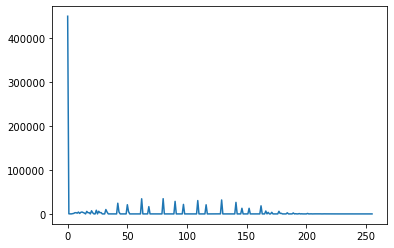

In [25]:
# show the histogram
img = cv2.imread('res_noise_removal.png')

# mencari frequensi pixel dari range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# menampilkan plotting histogram
plt.plot(histr)
plt.show()

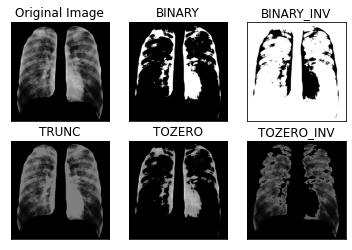

In [30]:
# operasi threshold
img = cv2.imread('res_noise_removal.png')

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # threshold binary => 127
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) # threshold binary inverse => 127
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) # threshold truncate => 127
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) # threshold to zero => 127
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) # threshold to zero inverse => 127
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'] # menampilkan kategori
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] # menampilkan gambar

# looping untuk menampilkan gambar + kategori
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [36]:
# menampilkan dan menyimpan citra final
cv2.imshow('img', thresh1)
cv2.imwrite('final.png', thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()